# Gale-Shapley Algorithm

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from matplotlib.ticker import MaxNLocator

In [4]:
import time

In [5]:
def gen_pref(n,m):
    applicants = np.array([np.random.permutation(m) for x in range(n)])
    colleges = np.array([np.random.permutation(n) for x in range(m)])
    return applicants, colleges

In [6]:
def find_best_applicants(college_p, applicants, q):
    # given a preference of applicants `college_p` and the list of applicants `applicants`, return the best `q` ones
    # could probably get a better vectorized implementation, but this suffices
    indices = np.argsort([np.where(college_p == x)[0][0] for x in applicants])[:q]
    return indices, np.array(applicants)[indices].astype('int')

In [7]:
def flip_arr(arr):
    # return a dict whose indices are the elements in `arr` and whose elements are the indices in `arr`
    new_arr = {}
    for i, x in enumerate(arr):
        if not(x in new_arr.keys()):
            new_arr[x] = [i]
        else:
            new_arr[x].append(i)
    return new_arr

In [8]:
def reject(applicant_prefs):
    # given a 2D array of multiple applicants' preferences of colleges, reject their top choices
    n = applicant_prefs.shape[0]
    output = np.unique(np.where(applicant_prefs == -1)[0], return_counts=True)
    indices = np.zeros(n, dtype=int)
    indices[output[0]] = output[1]
    applicant_prefs[np.arange(n), indices] = -1
    return applicant_prefs

In [9]:
def gale_shapley(applicant_pref, college_pref, q):
    n = applicant_pref.shape[0]
    m = applicant_pref.shape[1]
    pairings = -1*np.ones((m, q), dtype='int') # flag values for all
    round_num = 1
    while True:
        counts = np.unique(pairings, return_counts=True)
        if not(-1 in counts[0]):
            break
        else:
            print(round_num)
            print('{} rejections...'.format(counts[1][np.where(counts[0] == -1)][0]))
        # have all applicants apply to their top choice
        # then, colleges defer their top offers and reject the rest
        
        # get all the top colleges
        output = np.unique(np.where(applicant_pref == -1)[0], return_counts=True) # get how many -1s there are by row
        indices = np.zeros(n, dtype=int)
        indices[output[0]] = output[1]
        colleges = applicant_pref[np.arange(applicant_pref.shape[0]), indices]
        # this means that colleges[i] is the college applicant i applied to
        
        applications = flip_arr(colleges)
        # application creates a mapping for college->applicants
        for college, applicants in applications.items():
            index, best_applicants = find_best_applicants(college_pref[college], applicants, q)
            pairings[college,:best_applicants.shape[0]] = best_applicants
            # now reject the others
            applicants = np.delete(applicants, [np.where(applicants == x) for x in best_applicants])
            applicant_pref[applicants] = reject(applicant_pref[applicants])
        round_num += 1
    return pairings

In [10]:
def is_stable(guy_pref, girl_pref, couple_arrangement):
    for girl, guy in enumerate(couple_arrangement):
        preferred_guys = girl_pref[girl]
        preferred_guys = preferred_guys[:np.where(preferred_guys == guy)[0][0]]
        for guy in preferred_guys:
            # if the guy prefers her too, then it's unstable
            other_girl = np.where(couple_arrangement == guy)[0][0]
            preferred_girls = guy_pref[guy]
            preferred_girls = preferred_girls[:np.where(preferred_girls == other_girl)[0][0]]
            if girl in preferred_girls:
                return False
    return True

In [11]:
N, M = 80000, 700
q = N//M

In [12]:
applicant_pref, college_pref = gen_pref(N,M)
orig_a = np.copy(applicant_pref)
orig_c = np.copy(college_pref)

In [13]:
start = time.time()
pairings = gale_shapley(applicant_pref, college_pref, q)
print('{} applicants and {} colleges took {} seconds'.format(N, M, time.time()-start))

1
79800 rejections...
2
2886 rejections...
3
1696 rejections...
4
1139 rejections...
5
891 rejections...
6
695 rejections...
7
575 rejections...
8
456 rejections...
9
391 rejections...
10
337 rejections...
11
293 rejections...
12
258 rejections...
13
219 rejections...
14
191 rejections...
15
173 rejections...
16
156 rejections...
17
141 rejections...
18
119 rejections...
19
109 rejections...
20
101 rejections...
21
91 rejections...
22
85 rejections...
23
76 rejections...
24
66 rejections...
25
65 rejections...
26
62 rejections...
27
57 rejections...
28
47 rejections...
29
41 rejections...
30
32 rejections...
31
31 rejections...
32
28 rejections...
33
21 rejections...
34
18 rejections...
35
17 rejections...
36
17 rejections...
37
13 rejections...
38
11 rejections...
39
11 rejections...
40
11 rejections...
41
9 rejections...
42
9 rejections...
43
9 rejections...
44
9 rejections...
45
9 rejections...
46
8 rejections...
47
8 rejections...
48
8 rejections...
49
8 rejections...
50
8 rejectio

80000 applicants and 700 colleges took 484.21821093559265 seconds

In [14]:
applicant_outcomes = np.array([[np.where(x == orig_a[int(y)])[0][0] + 1 for y in accepted] for x, accepted in enumerate(pairings)]).flatten()

In [17]:
counts = np.unique(applicant_outcomes, return_counts=True)

In [24]:
counts = np.array(list(zip(counts[0], counts[1])))

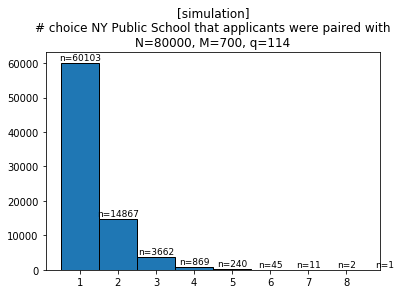

In [49]:
ax = plt.figure().gca()
plt.hist(applicant_outcomes, edgecolor='black', align='left', bins=np.arange(1,10))
plt.title('[simulation]\n# choice NY Public School that applicants were paired with\nN={}, M={}, q={}'.format(N,M,q))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
for i,x in counts:
    plt.text(i, x+800, s='n={}'.format(x), size=9, horizontalalignment='center')
plt.show()

$\frac{60,103}{80,000} \approx 75\%$ of students were accepted to their top choice.

$\frac{14,867}{80,000} \approx 18.5\%$ of students were accepted to their second choice.

$\frac{4,830}{80,000} \approx 6\%$ of students were not accepted to their top two choices.